In [344]:
import requests
import pandas as pd
import numpy as np

url2 = 'https://coincodex.com/apps/coincodex/cache/all_coins.json'
html = requests.get(url2).content
df = pd.read_json(html)
df.head(2)

,symbol,display_symbol,name,aliases,shortname,last_price_usd,market_cap_rank,volume_rank,price_change_1H_percent,price_change_1D_percent,price_change_7D_percent,price_change_30D_percent,price_change_90D_percent,price_change_180D_percent,price_change_365D_percent,price_change_3Y_percent,price_change_5Y_percent,price_change_ALL_percent,price_change_YTD_percent,volume_24_usd,display,trading_since,supply,last_update,ico_end,include_supply,use_volume,growth_all_time,ccu_slug,image_t,market_cap_usd,categories
0,BTC,BTC,Bitcoin,,bitcoin,54140.00,1.0,2.0,0.26,5.78,25.71,8.09,58.01,-5.91,407.28,718.34,8729.57,82656400.0,98.45,8.608070e+10,true,2010-08-16 00:00:00,18837087.0,1633607163,None,true,true,1970-01-01 00:01:10.794600,bitcoin,1507476369,1.019841e+12,"[1, 8]"
1,ETH,ETH,Ethereum,,ethereum,3573.16,2.0,3.0,0.43,5.28,20.26,-8.60,55.04,72.98,930.00,1476.86,27456.20,103468.0,391.86,2.839951e+10,true,2015-08-07 14:55:00,117828221.0,1633607163,2014-08-31 23:59:00,true,true,1970-01-01 00:01:32.549100,ethereum,1589277943,4.210191e+11,[1]


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12007 entries, 0 to 12006
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   symbol                     12007 non-null  object        
 1   display_symbol             12007 non-null  object        
 2   name                       12007 non-null  object        
 3   aliases                    12007 non-null  object        
 4   shortname                  12007 non-null  object        
 5   last_price_usd             7411 non-null   float64       
 6   market_cap_rank            3044 non-null   float64       
 7   volume_rank                3953 non-null   float64       
 8   price_change_1H_percent    12004 non-null  float64       
 9   price_change_1D_percent    12001 non-null  float64       
 10  price_change_7D_percent    11970 non-null  float64       
 11  price_change_30D_percent   11773 non-null  float64       
 12  pric

In [170]:
# there are 12004 empty values in the 'aliases' column
df['aliases'].value_counts()

                   12004
v-dimension vds        1
insurepal              1
ripple                 1
Name: aliases, dtype: int64

In [171]:
# same values in the column 'use_volume'
df['use_volume'].value_counts()

true    12007
Name: use_volume, dtype: int64

In [172]:
# same date in the column 'growth_all_time'
df['growth_all_time'].value_counts()

1970-01-01 00:00:00.000000000    1557
1970-01-01 00:00:01.000000000       4
1970-01-01 00:00:00.026303100       2
1970-01-01 00:00:00.100499000       2
1970-01-01 00:00:00.035681500       1
                                 ... 
1970-01-01 00:00:00.106229000       1
1970-01-01 00:00:00.859834000       1
1970-01-01 00:00:00.084568800       1
1970-01-01 00:00:00.000951005       1
1970-01-01 00:00:01.078960000       1
Name: growth_all_time, Length: 2501, dtype: int64

In [345]:
# delete these columns
df.drop(columns=['symbol','aliases','shortname','use_volume','growth_all_time','image_t'], inplace=True, axis=1)
df.head(2)

,display_symbol,name,last_price_usd,market_cap_rank,volume_rank,price_change_1H_percent,price_change_1D_percent,price_change_7D_percent,price_change_30D_percent,price_change_90D_percent,price_change_180D_percent,price_change_365D_percent,price_change_3Y_percent,price_change_5Y_percent,price_change_ALL_percent,price_change_YTD_percent,volume_24_usd,display,trading_since,supply,last_update,ico_end,include_supply,ccu_slug,market_cap_usd,categories
0,BTC,Bitcoin,54140.00,1.0,2.0,0.26,5.78,25.71,8.09,58.01,-5.91,407.28,718.34,8729.57,82656400.0,98.45,8.608070e+10,true,2010-08-16 00:00:00,18837087.0,1633607163,None,true,bitcoin,1.019841e+12,"[1, 8]"
1,ETH,Ethereum,3573.16,2.0,3.0,0.43,5.28,20.26,-8.60,55.04,72.98,930.00,1476.86,27456.20,103468.0,391.86,2.839951e+10,true,2015-08-07 14:55:00,117828221.0,1633607163,2014-08-31 23:59:00,true,ethereum,4.210191e+11,[1]


In [346]:
# convert date columns to appropriate format
df.rename(columns = {'display_symbol':'symbol'}, inplace = True)
df['trading_since'] = pd.to_datetime(df['trading_since'])
df['last_update'] = pd.to_datetime(df['last_update'])

In [175]:
# incorrect values in the column 'last_update'
df.loc[df['last_update'] > '1970-01-02']

,symbol,name,last_price_usd,market_cap_rank,volume_rank,price_change_1H_percent,price_change_1D_percent,price_change_7D_percent,price_change_30D_percent,price_change_90D_percent,price_change_180D_percent,price_change_365D_percent,price_change_3Y_percent,price_change_5Y_percent,price_change_ALL_percent,price_change_YTD_percent,volume_24_usd,display,trading_since,supply,last_update,ico_end,include_supply,ccu_slug,market_cap_usd,categories


In [347]:
# delete this column
df.drop('last_update', inplace=True, axis=1)

In [177]:
df['display'].value_counts()

true                   6870
not_trading            4164
not_trading_anymore     973
Name: display, dtype: int64

In [178]:
# analyze currently traded coins
df_trading = df.query("display=='true'")

In [179]:
df[['name','market_cap_rank']].sort_values(by = 'market_cap_rank').head(5)

,name,market_cap_rank
0,Bitcoin,1.0
1,Ethereum,2.0
4,Cardano,3.0
7,Tether,4.0
3,Binance Coin,5.0


In [180]:
data = df_trading[['name','market_cap_usd']].sort_values(by = 'market_cap_usd', ascending=False).head(10)
data.style.bar()

,name,market_cap_usd
5026,iBTC,4413996668529.000000
0,Bitcoin,1026674761082.000000
1,Ethereum,424268856697.000000
4986,THEGODCOIN,237293663210.000000
3,Binance Coin,75293034666.000000
4,Cardano,72489914487.000000
5,Yaapoo,71997569000.000000
6,HEX,67223302185.000000
7,Tether,62821853725.000000
8,Sumcoin,53719244150.000000


Among the coins currently traded on coincodex.com iBTC has the largest market cap at USD 4.4 trillion. The market capitalization of bitcoin is over  USD 1 trillion. But iBTC is not ranked by market cap on coincodex.com. 

Below we will analyze the coins rated by market capitalization.

In [181]:
data = df_trading.loc[df_trading['market_cap_rank'].notnull()][['name','market_cap_usd']].sort_values(by = 'market_cap_usd', ascending=False).head(10)
data.style.bar()

,name,market_cap_usd
0,Bitcoin,1026674761082.000000
1,Ethereum,424268856697.000000
3,Binance Coin,75293034666.000000
4,Cardano,72489914487.000000
7,Tether,62821853725.000000
9,XRP,50100183731.000000
10,Solana,47451680901.000000
12,Dogecoin,32809032990.000000
13,Polkadot,29301340764.000000
14,USD Coin,21097890000.000000


In [296]:
sum(df['market_cap_usd'])

17395849869055.838

The main coins in terms of capitalization are Bitcoin, Ethereum, Cardano, Tether, XRP, Solana, Dogecoin, Polkadot and USD Coin. 

The **total market cap** of all coins is almost **USD 17.4 trillion.**

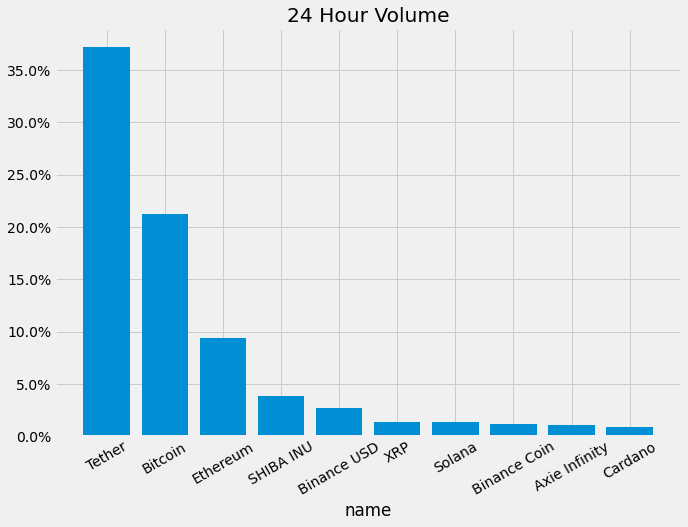

In [334]:
# find the most popular coins

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)

data = df_trading[['name', 'volume_24_usd']].sort_values(by = 'volume_24_usd',ascending=False).head(10)
data['perc'] = df_trading['volume_24_usd']/sum(df_trading['volume_24_usd'])

plt.bar(data['name'], data['perc'])
plt.xlabel('name')
plt.title('24 Hour Volume')
plt.xticks(rotation = 30)

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1));

plt.show()

**Tether** is the most popular coin among traded with the 24 hour volume of **USD 138.6 billion**, which is **37%** of the total Volume.

The 24h volume of **Bitcoin** and **Ethereum** are **USD 83.5 billion** and  **USD 28.8 billion** respectively (**21%** versus **9%**)

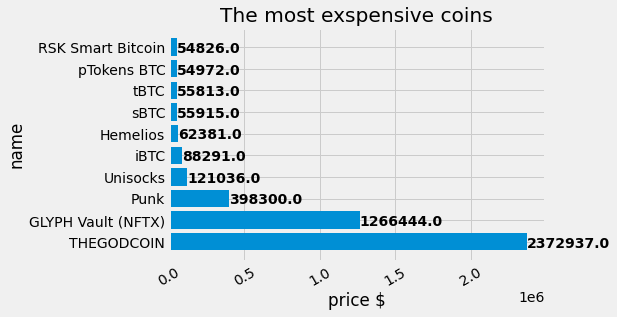

In [341]:
# display the most expensive coins

data = df_trading[['name', 'last_price_usd']].sort_values(by = 'last_price_usd',ascending=False).head(10)
plt.barh(data['name'], data['last_price_usd'])
plt.xlabel('price $')
plt.ylabel('name')
plt.title('The most exspensive coins')
plt.xticks(rotation = 30)
for i, v in enumerate(data['last_price_usd']):
    plt.text(v, i-0.25, str(v), color='black', fontweight='bold')
plt.show()

The most exspensive coin is THEGODCOIN. The price of this coin is **USD 2.4 million**.

At the same time, the current **Bitcoin** exchange rate is **USD 54,172.**

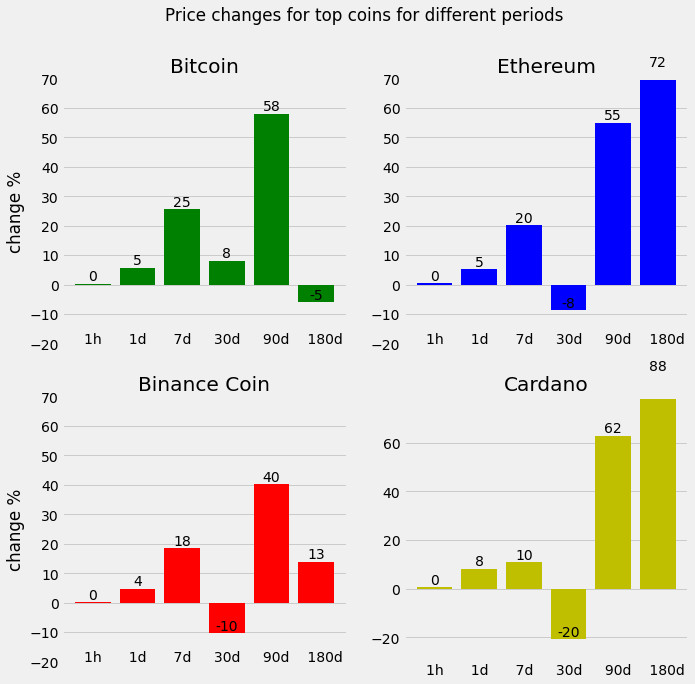

In [355]:
# take a closer look at the top 4 coins

fig = plt.figure(figsize = (10,10))
x0 = np.arange(6)

ax = fig.add_subplot(2,2,1)
y1 = (df.loc[df['name']=='Bitcoin'].iloc[:,5:11]).stack()
plt.ylim(-20,70)
plt.bar(x0,y1, facecolor='g')
plt.title('Bitcoin')
plt.ylabel('change %')
plt.text(-0.2, -20, '1h      1d      7d     30d     90d    180d')
plt.xticks(())
plt.grid(True)
for x, y in zip(x0, y1):
  if y1.any() >0:
    plt.text(x, y + 0.05, '%d' % y, ha='center', va = 'bottom')
  else:
    plt.text(x, -y - 0.05, '%d' % y, ha='center', va = 'top')

plt.subplot (2, 2, 2)
plt.ylim(-20,70)
y2 = (df.loc[df['name']=='Ethereum'].iloc[:,5:11]).stack()
plt.bar(x0,y2,facecolor='b')
plt.xticks(())
plt.title('Ethereum')
plt.text(-0.2, -20, '1h      1d      7d     30d     90d    180d')
plt.grid(True)
for x, y in zip(x0, y2):
  if y2.any() >0:
    plt.text(x, y + 0.05, '%d' % y, ha='center', va = 'bottom')
  else:
    plt.text(x, -y - 0.05, '%d' % y, ha='center', va = 'top')

ax = fig.add_subplot(2,2,3)
plt.ylim(-20,70)
y3 = (df.loc[df['name']=='Binance Coin'].iloc[:,5:11]).stack()
plt.bar(x0,y3, facecolor='r')
plt.suptitle('Price changes for top coins for different periods')
plt.title('Binance Coin')
plt.ylabel('change %')
plt.text(-0.2, -20, '1h      1d      7d     30d     90d    180d')
plt.xticks(())
plt.grid(True)
for x, y in zip(x0, y3):
  if y3.any() >0:
    plt.text(x, y + 0.05, '%d' % y, ha='center', va = 'bottom')
  else:
    plt.text(x, -y - 0.05, '%d' % y, ha='center', va = 'top')

plt.subplot (2, 2, 4)
plt.ylim(-30,79)
y4 = (df.loc[df['name']=='Cardano'].iloc[:,5:11]).stack()
plt.bar(x0,y4,facecolor='y')
plt.xticks(())
plt.title('Cardano')
plt.text(-0.2, -35, '1h      1d      7d     30d     90d    180d')
plt.grid(True)
for x, y in zip(x0, y4):
  if y4.any() >0:
    plt.text(x, y + 0.05, '%d' % y, ha='center', va = 'bottom')
  else:
    plt.text(x, -y - 0.05, '%d' % y, ha='center', va = 'top')

plt.show()

As we can see over the past 90 days **Bitcoin** has risen in price by **58%**. The rest of the coins also showed growth over the same period. If we consider a period of **6 months**, then only Bitcoin out of 4 presented coins **fell** in price by **5**%, while **Cardano** has risen by **88**%. There is an increase in all four coins over the last 24 hours.

In [358]:
#count the number of coins issued for the period

period = df['trading_since'].dt.to_period('M')  
data = df['name'].groupby(period).agg(count = 'count').reset_index()
data.head()

,trading_since,count
0,2010-08,1
1,2013-04,6
2,2013-05,4
3,2013-06,4
4,2013-07,9


In [359]:
data['trading_since'] = data['trading_since'].dt.strftime('%Y-%m')

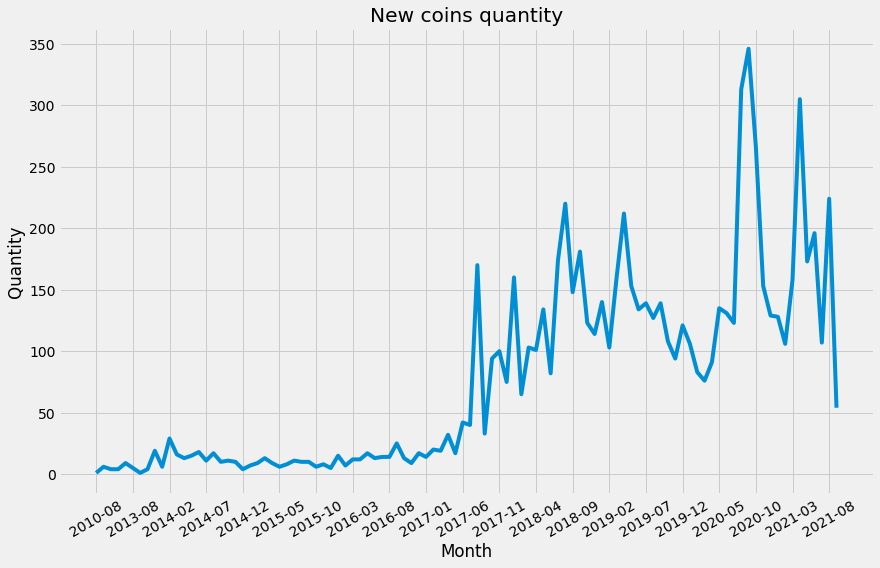

In [360]:
import seaborn as sns

plt.figure(figsize = (13,8))

sns.lineplot(x = 'trading_since', y = 'count', data = data)
#plt.plot(data['trading_since'], data['count'])

plt.title('New coins quantity')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.xticks(np.arange(0, len(data['trading_since'])+1, 5), rotation = 30)

plt.show()

The biggest increase in new coins is observed during the lockdown in the summer of 2020 . After that, there was a sharp decrease in the number of new coins, and in the spring of this year - another growth.

In [361]:
# analyze when the most popular coins for today were issued

df['rise'] = df['price_change_YTD_percent'].apply(lambda x: 'rise' if x > 0  else 'fall')
df['year'] = df['trading_since'].dt.to_period('Y')

data = pd.pivot_table(df, index = 'year', columns = 'rise', values = 'volume_24_usd', aggfunc = 'sum').reset_index()
data.fillna(0, inplace = True)
data

rise,year,fall,rise
0,2010,0.000000e+00,8.608070e+10
1,2013,6.643520e+05,1.124071e+10
2,2014,1.113744e+06,2.894500e+09
3,2015,9.380133e+07,2.857247e+10
4,2016,2.238584e+06,3.822629e+09
5,2017,1.640758e+08,1.637966e+11
6,2018,2.787344e+09,1.176717e+10
7,2019,1.091813e+10,9.013617e+09
8,2020,1.698234e+10,2.643577e+10
9,2021,3.033415e+09,6.747589e+09


In [362]:
data['year'] = data['year'].dt.strftime('%Y')

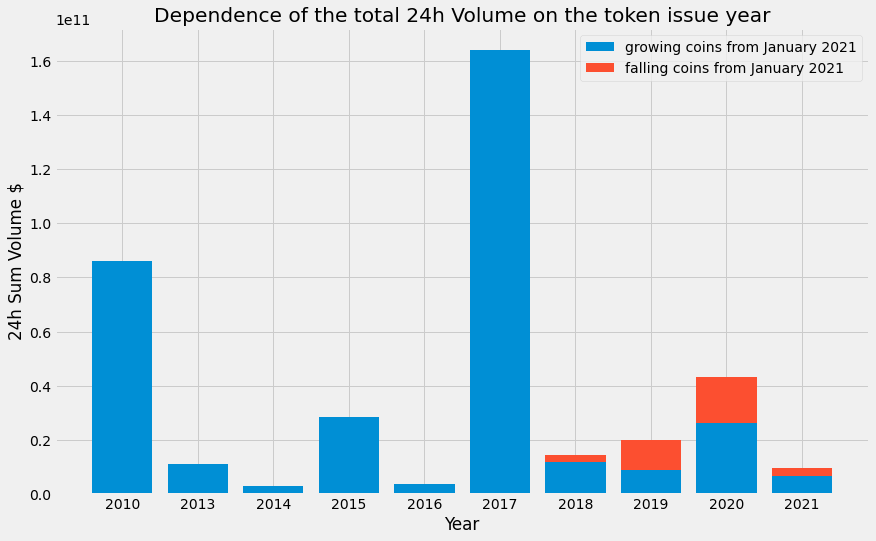

In [363]:
plt.figure(figsize = (13,8))

plt.bar(data['year'], data['rise'])
plt.bar(data['year'], data['fall'], bottom = data['rise'])

plt.legend(['growing coins from January 2021','falling coins from January 2021'])


plt.title('Dependence of the total 24h Volume on the token issue year')
plt.xlabel('Year')
plt.ylabel('24h Sum Volume $')

plt.show()

Thus, the most popular coins to date were issued in 2017. The least popular coins of 2014 and 2016. Coins that have increased their value since the beginning of this year prevail in circulation. Nevertheless, coins falling in price are also quite popular.